<a href="https://colab.research.google.com/github/AlfariziDwiPrasetyo/wine_quality_ann/blob/main/wine_quality_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Manage Dependencies**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC
from tensorflow.keras.regularizers import l2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

**Load Dataset**

In [2]:
wine_ds = pd.read_csv('/content/winequality-red.csv')

In [3]:
# Cek value yg hilang dari dataset
wine_ds.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [4]:
# 5 baris pertama dataset
wine_ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **Data Analisis dan Visualisasi**

In [5]:
# Ringkasan statistik dataset
wine_ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Korelasi antar kolom

In [6]:
corr = wine_ds.corr()

<Axes: >

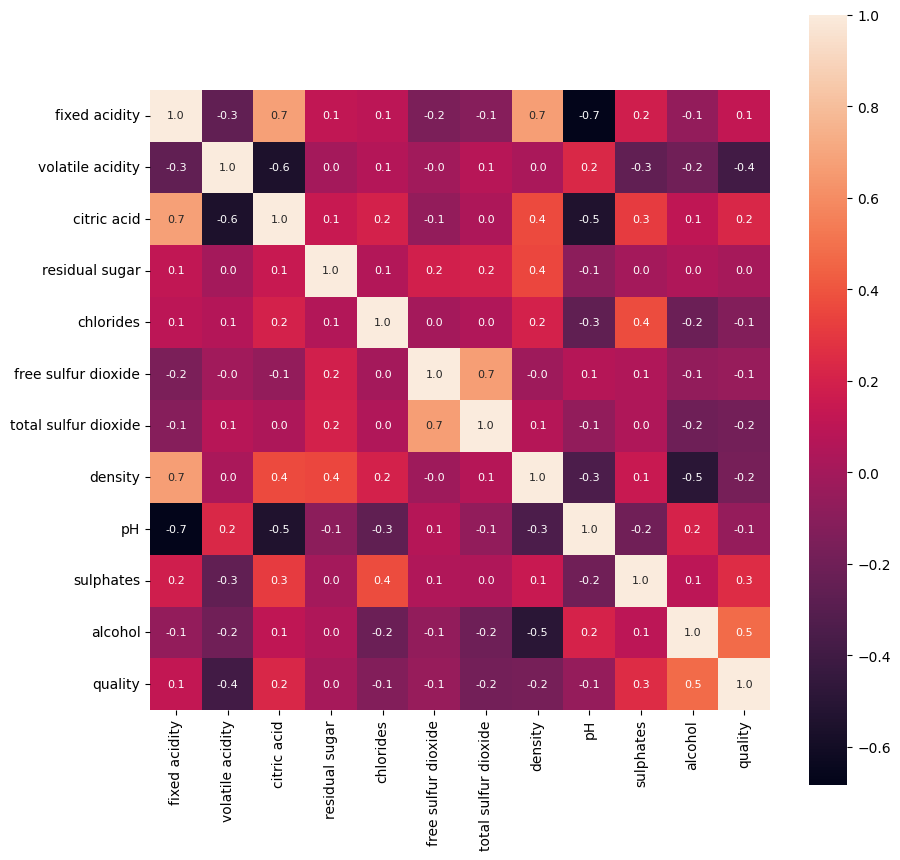

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size' : 8} )

# **Data Preprocessing**

In [8]:
# Memisahkan data dan label
X = wine_ds.drop('quality', axis=1)

In [9]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

### **Binarisasi Label**

In [10]:
Y = wine_ds['quality'].apply(lambda y_value : 1 if y_value >=6 else 0)

### **Train & Test Data**

In [11]:
# Standarasasi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train dan test data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

### **Train model**

In [12]:
model = Sequential([
    Input(shape=(X.shape[1],)),

    Dense(64, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(32, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Nadam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', AUC()])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# train model
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=1, callbacks=[early_stopping])

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4722 - auc: 0.4997 - loss: 1.4101 - val_accuracy: 0.7000 - val_auc: 0.7994 - val_loss: 1.1778
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6638 - auc: 0.7150 - loss: 1.1611 - val_accuracy: 0.7437 - val_auc: 0.8208 - val_loss: 1.0478
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7146 - auc: 0.7745 - loss: 1.0368 - val_accuracy: 0.7531 - val_auc: 0.8238 - val_loss: 0.9627
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7105 - auc: 0.7901 - loss: 0.9606 - val_accuracy: 0.7500 - val_auc: 0.8206 - val_loss: 0.9027
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7571 - auc: 0.8312 - loss: 0.8666 - val_accuracy: 0.7531 - val_auc: 0.8253 - val_loss: 0.8521
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7224 - auc: 0.7931 - loss: 0.8705 - val_accuracy: 0.7594 - val_auc: 0.8229 - val_loss: 0.8149
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

# **Evaluasi model**

### **Test akurasi model**

In [13]:
# prediksi
y_pred = model.predict(X_test)

# ubah ke binary
y_pred_binary = (y_pred > 0.5).astype("int32").flatten()

Y_test = Y_test.values if hasattr(Y_test, 'values') else Y_test


# cek akurasi model
test_data_accuracy = accuracy_score(Y_test, y_pred_binary)
print(f"Akurasi : {test_data_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Akurasi : 0.784375


# **Hasil**

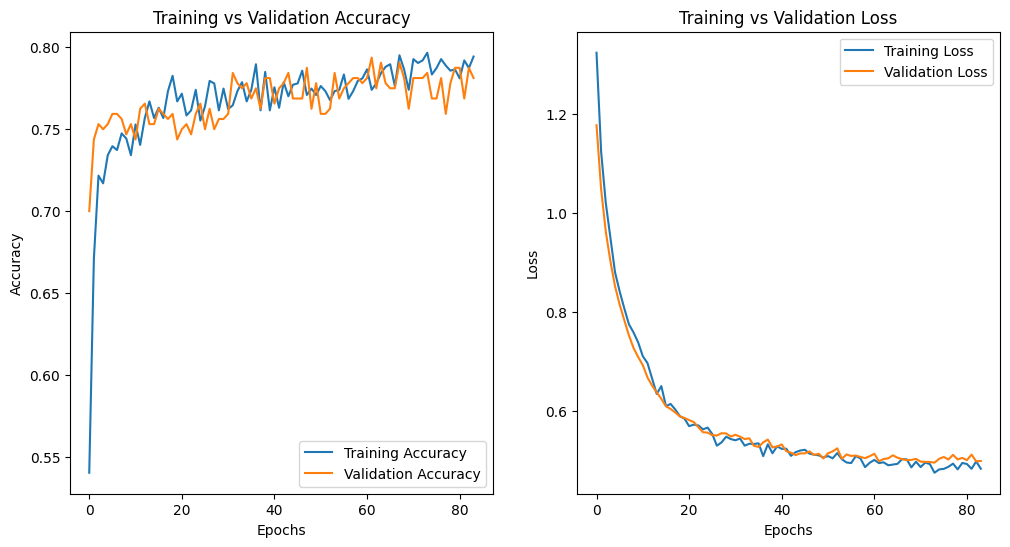

In [14]:
# Validasi Akurasi dan Validasi Loss

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


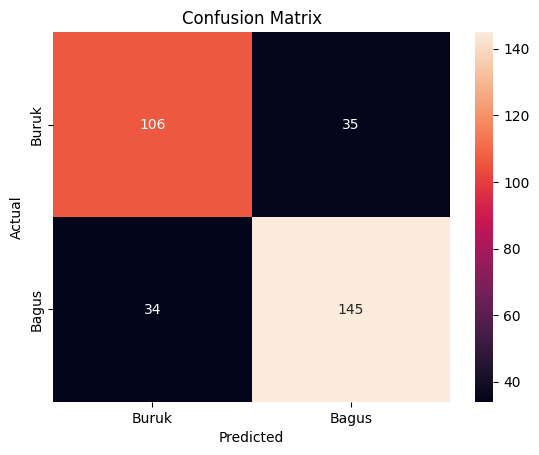

In [23]:
# Confussion Matrix
cm = confusion_matrix(Y_test, y_pred_binary)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Buruk', 'Bagus'], yticklabels=['Buruk', 'Bagus'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Save model**

In [16]:
model.save('model_nadam_wine.h5')

# **Test prediksi model**

In [22]:
sample_manual_good = {
    'fixed acidity': 7.4,
    'volatile acidity': 0.3,
    'citric acid': 0.45,
    'residual sugar': 6.1,
    'chlorides': 0.04,
    'free sulfur dioxide': 35.0,
    'total sulfur dioxide': 90.0,
    'density': 0.996,
    'pH': 3.3,
    'sulphates': 0.75,
    'alcohol': 11.5
}

sample_manual_bad = {
    'fixed acidity': 9.0,
    'volatile acidity': 0.7,
    'citric acid': 0.0,
    'residual sugar': 1.2,
    'chlorides': 0.09,
    'free sulfur dioxide': 5.0,
    'total sulfur dioxide': 14.0,
    'density': 1.000,
    'pH': 2.9,
    'sulphates': 0.35,
    'alcohol': 8.5
}

# Convert dictionary ke DataFrame
manual_good_df = pd.DataFrame([sample_manual_good])
manual_bad_df = pd.DataFrame([sample_manual_bad])

# Standardisasi input
manual_good_scaled = scaler.transform(manual_good_df)
manual_bad_scaled = scaler.transform(manual_bad_df)

# Prediksi
pred_manual_good = model.predict(manual_good_scaled)
pred_manual_bad = model.predict(manual_bad_scaled)

# Interpretasi
pred_label_good = "Good" if pred_manual_good > 0.5 else "Bad"
pred_label_bad = "Good" if pred_manual_bad > 0.5 else "Bad"

# Output
print(f"Sampel Manual GOOD - Prediksi: {pred_label_good} (Prob: {pred_manual_good[0][0]:.2f})")
print(f"Sampel Manual BAD  - Prediksi: {pred_label_bad} (Prob: {pred_manual_bad[0][0]:.2f})")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Sampel Manual GOOD - Prediksi: Good (Prob: 0.87)
Sampel Manual BAD  - Prediksi: Bad (Prob: 0.01)
